<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
This notebook Assign leading edge genes to clusters based on gene-pathway graph

<strong>Input Data:</strong>


<strong>Input Data:</strong>
From `run_partitioning.py` and `snRNAseq_stats/compute_stats.ipynb`

| or from [OSF: /snRNAseq_processed](https://osf.io/mnysb/files/osfstorage):


`kl_loss.npy`, `all_paths.npy`, `leading_edge_0825Ex.csv`, `all_scores_0825.csv`


<strong>Figures:</strong>

`Fig2`

<strong>Last Run All:</strong>
June 17, 2025


In [1]:
import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

import numpy as np
import gseapy
from scipy.sparse import csr_matrix
from tqdm.contrib.concurrent import process_map
from functools import partial
from scipy.sparse.csgraph import shortest_path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx

from ABCA7lof2.plotting_geneclusters import get_le_clusters, get_layout, plot_graph
from ABCA7lof2.geneclusters import get_gene_pathway_matrix
from ABCA7lof2.kl_additional_plotting import get_scores_per_cluster, plot_densities, plot_rep_names, get_top_genes, get_names_per_cluster

In [2]:
# save text as editable
import matplotlib as mpl
# For PDF output:
mpl.rcParams['pdf.fonttype'] = 42      # 42 = TrueType (editable)
# For SVG output:
mpl.rcParams['svg.fonttype'] = 'none' 

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

#### Cluster genes by KL with seed for min loss

In [3]:
# get pathway gene matrix
mat = get_gene_pathway_matrix('../../processed_data/all_paths.npy')
kl_loss = np.load('../../processed_data/kl_loss.npy')
seed = np.argmin(kl_loss)
leading_edge = '../../processed_data/leading_edge_0825Ex.csv'
frame, mat_sub = get_le_clusters(leading_edge, 'Ex', mat, seed, 50)
frame.to_csv('../../processed_data/pm_kl_frame.csv')
mat_sub.to_csv('../../processed_data/pm_kl_mat.csv')

(111, 268)


4it [00:02,  1.34it/s, tot_impr=685, last_impr=0, loss=285]  


#### Load data

In [4]:
# get clusters for Ex
scores = pd.read_csv('../../processed_data/all_scores_0825.csv', index_col=0)
scores['score'] = scores['Ex']
frame_pm = pd.read_csv('../../processed_data/pm_kl_frame.csv', index_col=0)
frame_pm['new_cluster'] = frame_pm['cluster']
frame_pm['new_cluster_mapped'] = ['PM.'+str(x) for x in frame_pm['cluster']]
scores_pm = get_scores_per_cluster(scores, frame_pm, 'new_cluster_mapped')
pm_mat = pd.read_csv('../../processed_data/pm_kl_mat.csv', index_col=0)

In [5]:

dictionary = dict(zip(np.unique(frame['cluster']), [2,7,4,1,3,6,5,0]))
frame['cluster'] = [dictionary[x] for x in frame['cluster']]

# plot graph
s=10000
graph, pos, cur_labels, unique_clusters, colors, layout = get_layout(frame, mat_sub, s, 15)#10000


#### plot score distributions per cluster

In [6]:
colors_dict = {'PM.3': (0.847, 0.106, 0.376, 1.0),
 'PM.4': (0.902, 0.318, 0.0, 1.0),
 'PM.2': (1.0, 0.549, 0.0, 1.0),
 'T+C.29': (1.0, 0.718, 0.302, 1.0),
 'PM.1': (0.082, 0.396, 0.753, 1.0),
 'PM.5': (0.18, 0.49, 0.196, 1.0),
 'PM.0': (0.941, 0.384, 0.573, 1.0),
 'T.12': (0.259, 0.647, 0.961, 1.0),
 'T.11': (0.4, 0.733, 0.416, 1.0),
 'G.20': (0.89, 0.106, 0.137, 1.0),
 'T.8': (0.6, 0.196, 0.8, 1.0),
 'G.23': (1.0, 0.843, 0.0, 1.0),
 'PM.7': (0.251, 0.878, 0.816, 1.0),
 'G.18': (0.647, 0.165, 0.165, 1.0),
 'PM.6': (0.0, 0.5, 0.5, 1.0),
 'T.9': (1.0, 0.0, 1.0, 1.0)}

In [7]:
names_pm = dict(zip(np.unique(frame_pm['new_cluster_mapped']), get_names_per_cluster(pm_mat, frame_pm, 'new_cluster_mapped', 3)))

/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/kl_additional_plotting.py:228: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores[cluster], color=colors_dict[cluster], kde=True,
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/kl_additional_plotting.py:228: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

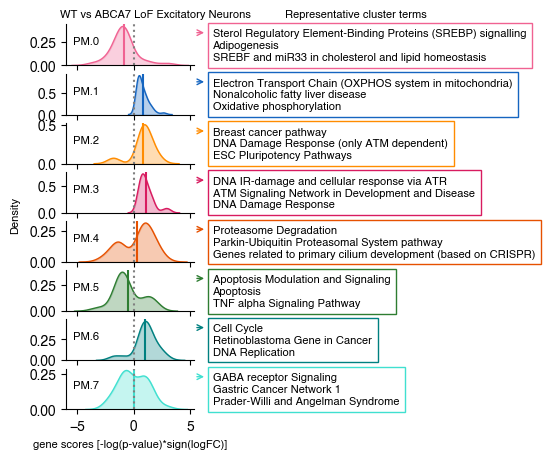

In [8]:
# FINAL PANEL
plot_densities(scores_pm, colors_dict, names_pm, np.unique(frame_pm['new_cluster_mapped']), 'WT vs ABCA7 LoF Excitatory Neurons', figsize=(2.5, 5))
plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/fig2/kl_densities.pdf', bbox_inches='tight', dpi=300)

/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/plotting_geneclusters.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==0].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1)
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/plotting_geneclusters.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==1].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1, marker='s')
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


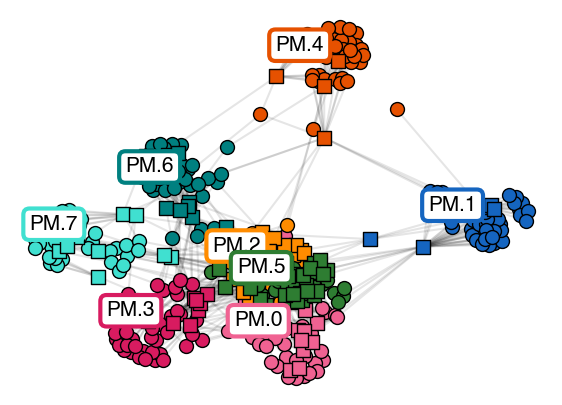

In [9]:
# get graph layout pm
frame_pm['cluster'] = frame_pm['new_cluster_mapped']

s=10000
graph_pm, pos_pm, cur_labels_pm, unique_clusters_pm, colors_pm, layout_pm = get_layout(frame_pm, pm_mat, s, 15)

out_path = '../../editorial_paper/main_panels_svgs/fig2/pm_kl_network'
plot_graph(layout_pm, pos_pm, graph_pm, cur_labels_pm, unique_clusters_pm, [colors_dict[x] for x in unique_clusters_pm], out_path)